# TensorFlow Models

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels\HelperFunctions')
import auxiliaries as aux
os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels')

In [2]:
tf.__version__

'2.16.2'

## Setup

In [3]:
# Develop Testing and Applied Window
species = 'Moose'
file_name = 'yl1'

tf_tut_window = aux.WindowGenerator(input_width=aux.OUT_STEPS,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS,
                               cv_name=f'{species}/{file_name}')

reg_window = aux.RegressiveWindow(f'{species}/{file_name}')
classification_window = aux.ClassificationWindow(f'{species}/{file_name}', 3)

results = {}

print(f'{species}:')
print('------Tensorflow Tutorial Window------')
print(f'Original Data Size: {len(tf_tut_window.orig_df)}')
print(f'Training Data Size: {len(tf_tut_window.train_df)}')
print(f'Validation Data Size: {len(tf_tut_window.val_df)}')
print(f'Testing Data Size: {len(tf_tut_window.test_df)}')

print()

print('------Regressive Model Window------')
print(f'Original Data Size: {len(reg_window.orig_df)}')
print(f'Training Data Size: {int(len(reg_window.train_df)*(7/9))}')
print(f'Validation Data Size: {int(len(reg_window.train_df)*(2/9))}')
print(f'Testing Data Size: {len(reg_window.test_df)}')

print()

print('------Classification Model Window------')
print(f'Original Data Size: {len(classification_window.orig_df)}')
print(f'Training Data Size: {int(len(classification_window.train_df)*(7/9))}')
print(f'Validation Data Size: {int(len(classification_window.train_df)*(2/9))}')
print(f'Testing Data Size: {len(classification_window.test_df)}')

Moose:
------Tensorflow Tutorial Window------
Original Data Size: 7692
Training Data Size: 5384
Validation Data Size: 1538
Testing Data Size: 770

------Regressive Model Window------
Original Data Size: 7692
Training Data Size: 4187
Validation Data Size: 1196
Testing Data Size: 2308

------Classification Model Window------
Original Data Size: 7692
Training Data Size: 4187
Validation Data Size: 1196
Testing Data Size: 2308


## Autoregressive Model

- Good start
- Very inaccurate

In [4]:
autoregressive_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS, num_vars=3)

In [5]:
history = aux.compile_and_fit(autoregressive_model, tf_tut_window)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - loss: 0.7854 - mean_absolute_error: 0.6878 - val_loss: 0.6389 - val_mean_absolute_error: 0.5969
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5779 - mean_absolute_error: 0.5499 - val_loss: 0.5516 - val_mean_absolute_error: 0.5561
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5597 - mean_absolute_error: 0.5349 - val_loss: 0.5712 - val_mean_absolute_error: 0.5670
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.5456 - mean_absolute_error: 0.5274 - val_loss: 0.5910 - val_mean_absolute_error: 0.5662


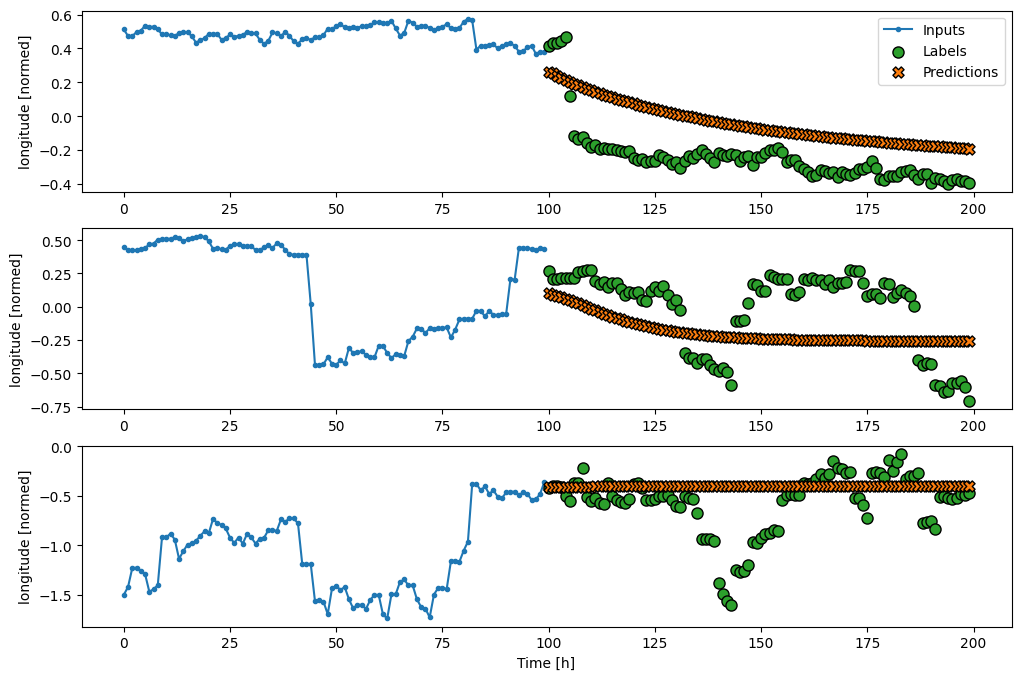

In [6]:
tf_tut_window.plot(autoregressive_model, plot_col='longitude')

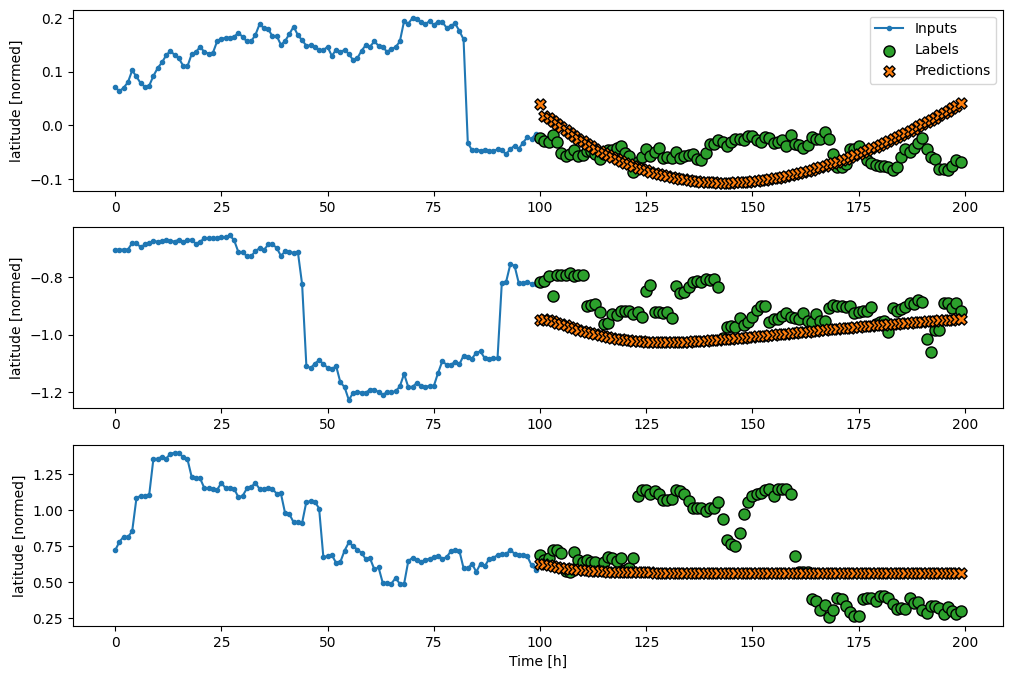

In [7]:
tf_tut_window.plot(autoregressive_model, plot_col='latitude')

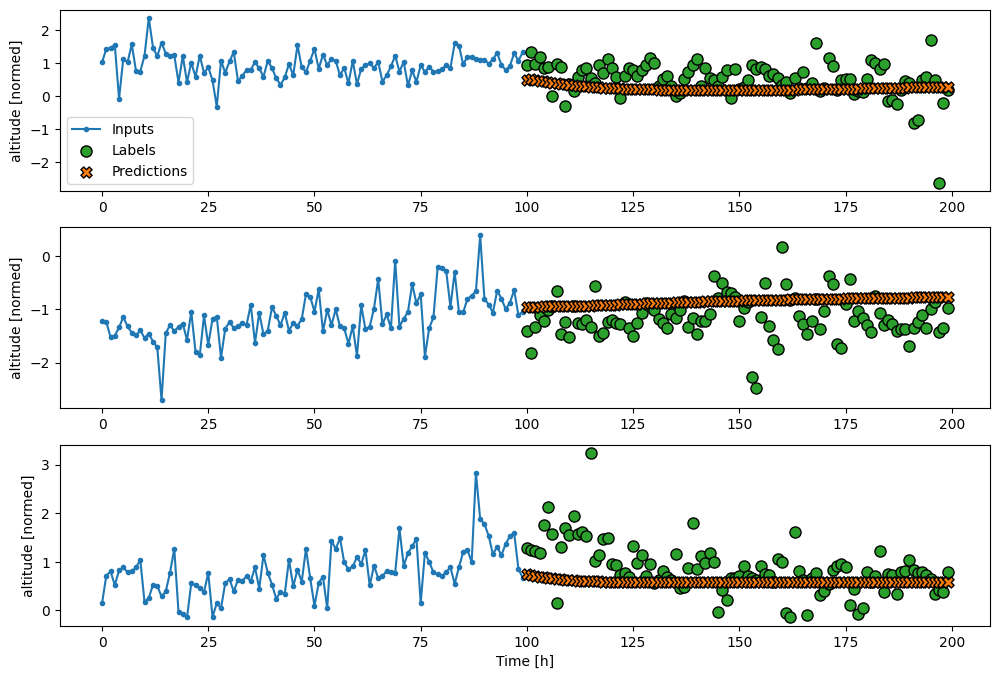

In [8]:
tf_tut_window.plot(autoregressive_model, plot_col='altitude')

In [9]:
results['Autoregressive'] = autoregressive_model.evaluate(tf_tut_window.test, verbose=1, return_dict=True)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.0713 - mean_absolute_error: 0.7785


In [10]:
autoregressive_model.save(f'ModelCreation/SavedModels/{species}/{file_name}_autoregressive.keras')
tf_tut_window.extend_to_csv(url_dest=f'{species}/{file_name}_autoregressive', species=species, model=autoregressive_model)

In [11]:
autoregressive_model = tf.keras.models.load_model(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels\ModelCreation\SavedModels\Moose\yl1_autoregressive.keras', custom_objects={'FeedBack':aux.FeedBack})

In [12]:
tf_tut_window

Total window size: 200
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
Label column name(s): None

## RNN Single Shot Model

In [13]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(aux.OUT_STEPS*len(tf_tut_window.column_indices),
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([aux.OUT_STEPS, len(tf_tut_window.column_indices)])
])

history = aux.compile_and_fit(multi_lstm_model, tf_tut_window)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.8250 - mean_absolute_error: 0.7034 - val_loss: 0.5507 - val_mean_absolute_error: 0.5424
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5222 - mean_absolute_error: 0.5217 - val_loss: 0.4969 - val_mean_absolute_error: 0.5075
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4741 - mean_absolute_error: 0.4886 - val_loss: 0.4842 - val_mean_absolute_error: 0.4977
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4575 - mean_absolute_error: 0.4749 - val_loss: 0.4872 - val_mean_absolute_error: 0.4973
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4371 - mean_absolute_error: 0.4625 - val_loss: 0.4919 - val_mean_absolute_error: 0.4978


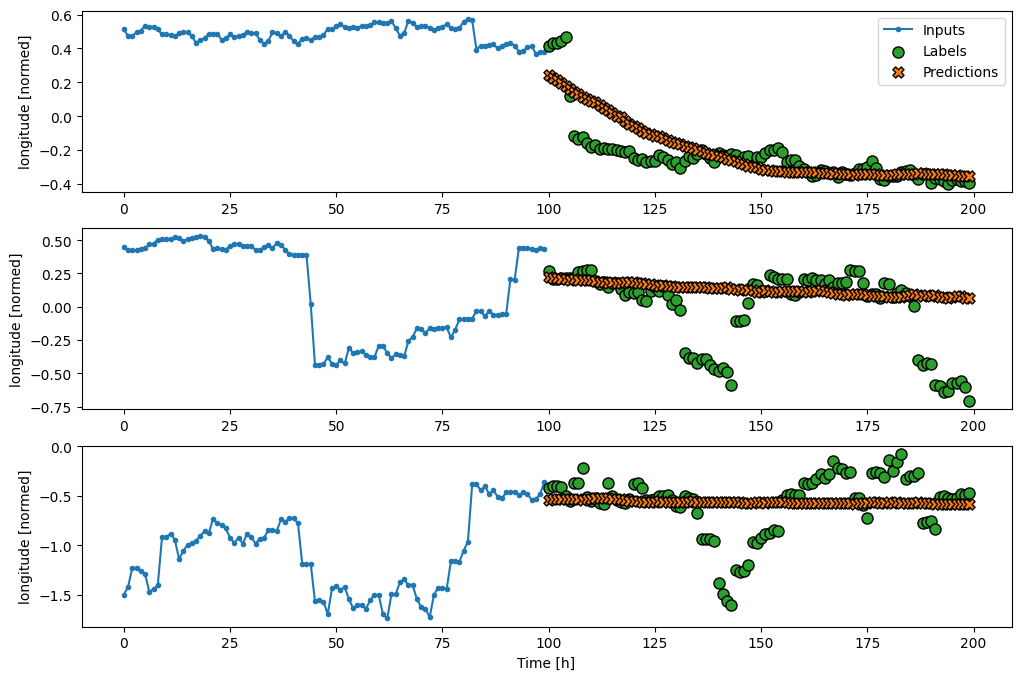

In [14]:
tf_tut_window.plot(multi_lstm_model, plot_col='longitude')

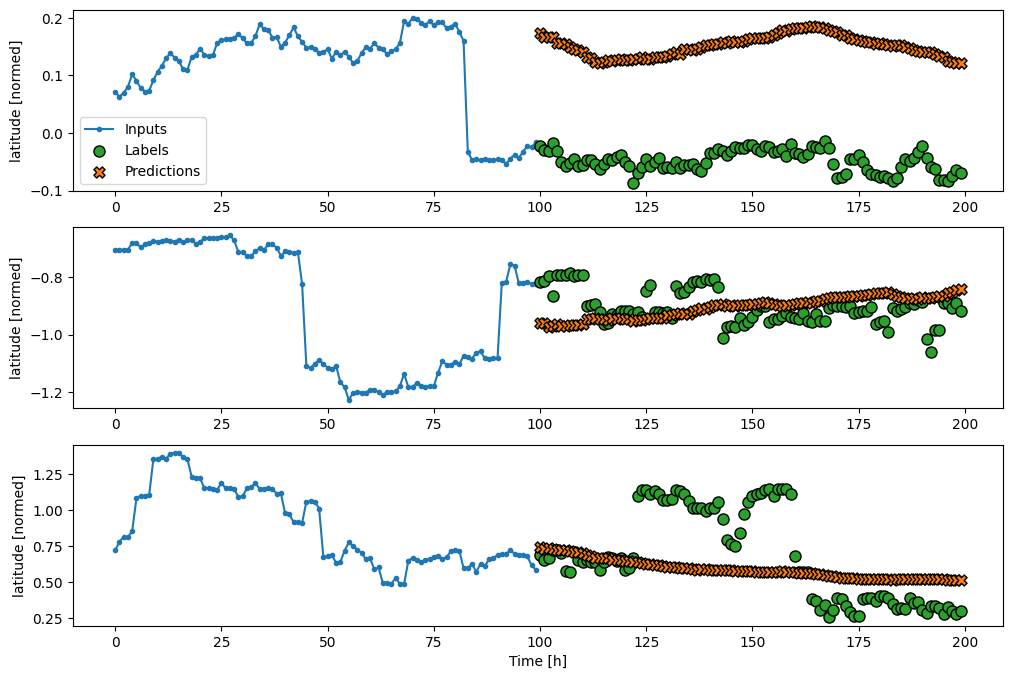

In [15]:
tf_tut_window.plot(multi_lstm_model, plot_col='latitude')

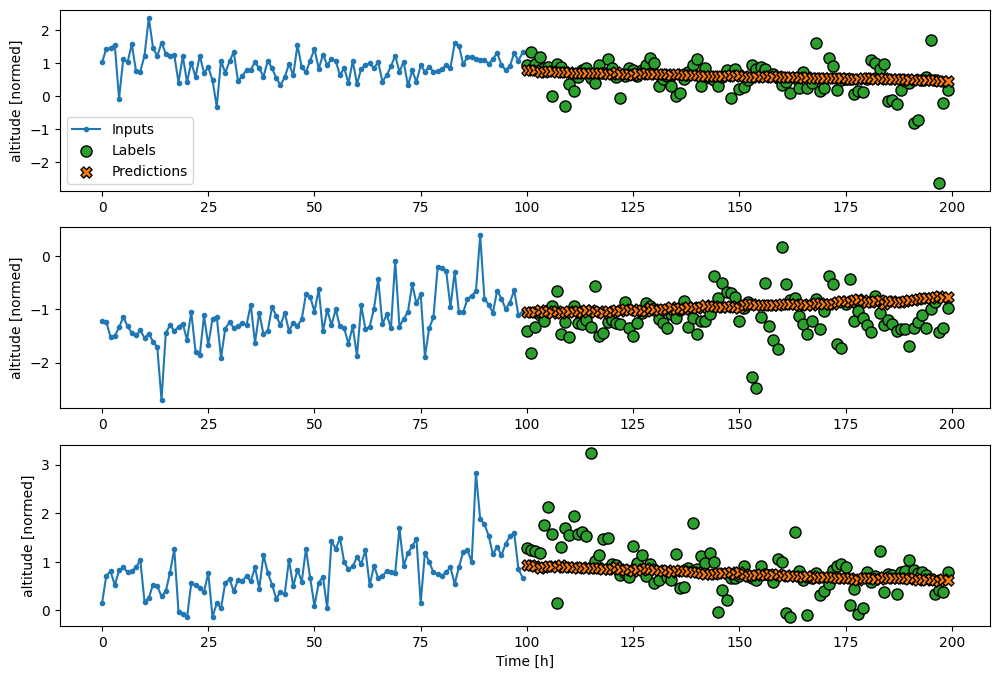

In [16]:
tf_tut_window.plot(multi_lstm_model, plot_col='altitude')

In [17]:
results['Single Shot'] = multi_lstm_model.evaluate(tf_tut_window.test, verbose=1, return_dict=True)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0885 - mean_absolute_error: 0.7639


In [18]:
tf_tut_window.extend_to_csv(url_dest=f'{species}/{file_name}_singleshot', species=species, model=multi_lstm_model)
multi_lstm_model.save(f'ModelCreation/SavedModels/{species}/{file_name}_singleshot.keras')

## Regressive Model

In [19]:
regressive_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1,3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

reg_window.model_compilation_and_fitting(regressive_model)

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.0018 - mean_absolute_error: 0.8146
Epoch 2/20
  8/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1245 - mean_absolute_error: 0.8696  

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error
  current = self.get_monitor_value(logs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0092 - mean_absolute_error: 0.8179
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9723 - mean_absolute_error: 0.8035
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0061 - mean_absolute_error: 0.8186
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0150 - mean_absolute_error: 0.8214
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9831 - mean_absolute_error: 0.8071
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9891 - mean_absolute_error: 0.8112
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9919 - mean_absolute_error: 0.8130
Epoch 9/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0189 - mean_absolute_error: 0.8181
Epoch 10/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0037 - mean_absolute_error: 0.8154
Epoch 11/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0450 - mean_absolute_error: 0.8312
Epoch 12/20
169/169 ━━━━━━━━━━━━━━━━━━━

In [20]:
regressive_model(reg_window.train_input)*reg_window.train_df[['longitude', 'latitude', 'altitude']].std() + reg_window.train_df[['longitude', 'latitude', 'altitude']].mean()

<tf.Tensor: shape=(5384, 3), dtype=float32, numpy=
array([[-111.40821 ,   57.369137,  293.30963 ],
       [-111.40843 ,   57.370647,  293.8976  ],
       [-111.408485,   57.371136,  294.02695 ],
       ...,
       [-111.408325,   57.369503,  293.62885 ],
       [-111.408455,   57.370434,  293.79077 ],
       [-111.4083  ,   57.369385,  293.48474 ]], dtype=float32)>

In [21]:
results['Regressive Model'] = regressive_model.evaluate(reg_window.test_input, reg_window.test_label, verbose=1, return_dict=True)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9478 - mean_absolute_error: 0.7741


In [23]:
reg_window.csv_extension(f'{species}/{file_name}_regressive', species, regressive_model)

IndexError: invalid index to scalar variable.

In [ ]:
regressive_model.save(f'ModelCreation/SavedModels/{species}/{file_name}_regressive.keras')

## Classification Model

In [ ]:
classification_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, 3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(classification_window.n_clusters, activation='softmax'),
])

classification_window.model_compilation_and_fitting(classification_model)

In [ ]:
classification_model(classification_window.test_input)

In [ ]:
results['Classification Model'] = classification_model.evaluate(classification_window.test_input, classification_window.test_label, verbose=1, return_dict=True)

In [ ]:
classification_window.csv_extension(f'{species}/{file_name}_classification', species, classification_model)

In [ ]:
classification_model.save(f'ModelCreation/SavedModels/{species}/{file_name}_classification.keras')

## Final Results

In [ ]:
results_df = pd.DataFrame(results).T
results_df.to_csv(f'ModelCreation/results/{species}/{file_name}_test_data.csv', index_label='Model_Name')
results_df